In [2]:
import importlib,sys,local_utils
from local_utils import *

# Discussion du cas $N=p^n$ avec $p$ premier.

Le triangle de Pascal est connu pour la structure fractale qu'on regarde ses termes modulo $p$, où $p$ est un nombre premier.

Par exemple dans "DES DÉCOUVERTES DANS LE TRIANGLE DE PASCAL", Gregor BERG, (https://mathinfo.unistra.fr/websites/math-info/irem/Publications/L_Ouvert/o_71_9-22.pdf), la position des triangles de "0" est discuté, et la dimension fractale associée est calculée.

On discute ici de l'existence d'une règle de construction géométrique par récurrence du Damier de pascal avec $N=p^n$ et $p$ premier, à partir du Damier obtenu pour $N=p^{n-1}$.

## Formulation géométrique pour $S^{p^n}_{i,j}\mod p$

L'exemple ci-dessous montre le damier modulo $p$, pour $N=3$, $9$ et $27$.

N= 3


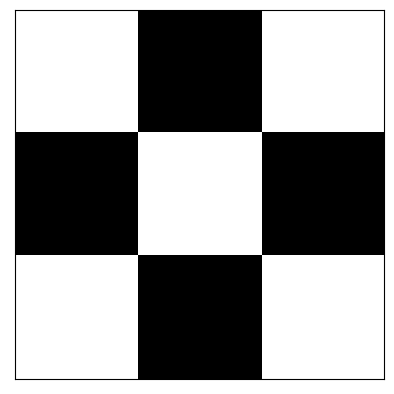

N= 9


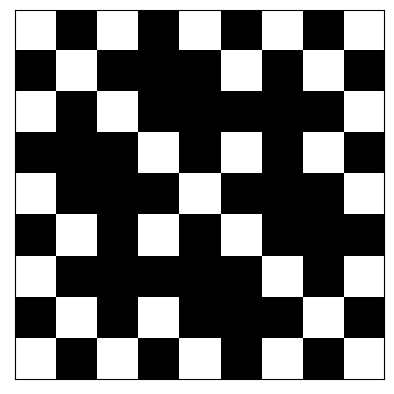

N= 27


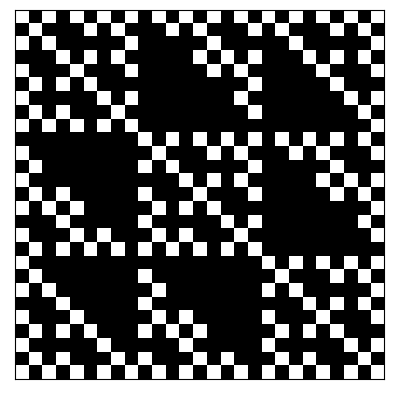

In [4]:
p=3
for n in [1,2,3]:
    N=p**n
    print("N=",N)
    S=damier_pascal_S(N)
    plt.figure()
    plt.imshow(((S%p)!=0).astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.xticks([])  
    plt.yticks([]) 
    plt.show()

On voit apparaître dans le damier des "triangles de 0" comme dans le triangle de Pascal

In [5]:
p=3
for n in [3]:
    N=p**n
    print("S=A+B, N=",N)
    print("A")
    A=damier_pascal_A(N+1)
    Affiche(A%p)
    print("B")
    B=damier_pascal_B(N+1)
    Affiche(B%p)
        
    #plt.figure()
    #plt.imshow(((A%p)!=0).astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
    #plt.xticks([])  
    #plt.yticks([]) 
    #plt.show()

S=A+B, N= 27
A
i= 0 |  1 
i= 1 |  1  1 
i= 2 |  1  2  1 
i= 3 |  1  0  0  1 
i= 4 |  1  1  0  1  1 
i= 5 |  1  2  1  1  2  1 
i= 6 |  1  0  0  2  0  0  1 
i= 7 |  1  1  0  2  2  0  1  1 
i= 8 |  1  2  1  2  1  2  1  2  1 
i= 9 |  1  0  0  0  0  0  0  0  0  1 
i=10 |  1  1  0  0  0  0  0  0  0  1  1 
i=11 |  1  2  1  0  0  0  0  0  0  1  2  1 
i=12 |  1  0  0  1  0  0  0  0  0  1  0  0  1 
i=13 |  1  1  0  1  1  0  0  0  0  1  1  0  1  1 
i=14 |  1  2  1  1  2  1  0  0  0  1  2  1  1  2  1 
i=15 |  1  0  0  2  0  0  1  0  0  1  0  0  2  0  0  1 
i=16 |  1  1  0  2  2  0  1  1  0  1  1  0  2  2  0  1  1 
i=17 |  1  2  1  2  1  2  1  2  1  1  2  1  2  1  2  1  2  1 
i=18 |  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  1 
i=19 |  1  1  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  1  1 
i=20 |  1  2  1  0  0  0  0  0  0  2  1  2  0  0  0  0  0  0  1  2  1 
i=21 |  1  0  0  1  0  0  0  0  0  2  0  0  2  0  0  0  0  0  1  0  0  1 
i=22 |  1  1  0  1  1  0  0  0  0  2  2  0  2  2  

On peut remarquer que les grands triangles de "0" qui apparaissent dans la matrice A, sont en fait également présents dans la matrice $B$, en raison de la symétrie, qui permet de passer de A à B,  qui laisse les triangles de "0" invariants.

L'observation des damiers pour les petites valeurs de $p$ et $n$, permet d'identifier une règle simple de construction du damier modulo $p$ par récurrence. 

Au lieu de remplir $D$ avec des 0 et 1 en fonction du reste de la division entiere par N, on construit ici une matrice $D$ différente, où on distingue 3 cas:
- $D^{N=p^n}_{i,j}=1$ lorsque $S^{N=p^n}_{i,j}$ est un multiple de $p$, et qu'on le sait parce qu'il est dans un "triangle de 0" au sens de BERG.
- $D^{N=p^n}_{i,j}=0$ lorsque $S^{N=p^n}_{i,j}$ est un multiple de $p$, et qu'on le sait parce qu'il est construit à partir d'une cellule du damier régulier pour $N=p$.
- $D^{N=p^n}_{i,j}=2$ lorsque $S^{N=p^n}_{i,j}$ n'est pas un multiple de $p$, et qu'on le sait parce qu'il est construit à partir d'une cellule du damier régulier pour $N=p$.


In [6]:
def DamierPn(p,n,Debug=False):
    # =0 multiple de p
    # =1 0 car triangle de zeros
    # =2 non multiple de p
    if not isprime(p):
        print("ERROR p not prime")
        return -1
    N=p**n
    if n==1:
        D=np.zeros((p,p),dtype='int')
        for i in range(p):
            for j in range(p):
                if (i+j)%2==0:
                    D[i,j]=2
    else:
        Nprime=p**(n-1)
        D=np.zeros((p**n,p**n),dtype='int')
        # on récupère la matrice D au rang n-1
        Dprime=DamierPn(p,n-1,Debug=Debug)
        # on remplit la diagonale de D
        # avec Dprime
        for i in range(0,N,Nprime):
            D[i:i+Nprime,i:i+Nprime]=Dprime
        # On duplique Dprime, afin
        # de calculer le miroir de Dprime
        DprimeReverse=Dprime.copy()
        # Le triangle supérieur droit est mis à 1
        # car correspond aux triangles de 0
        for i in range(0,Nprime-1):
            for j in range(1+i,Nprime):
                Dprime[i,j]=1
                DprimeReverse[i,j]=1
        # on construit le damier miroir 
        # en permuttant les 0 et les 2
        # mais sans modifier les elements 
        # qui correspondent aux triangles de 0
        # au sens de Berg.
        for i in range(Nprime):
            for j in range(Nprime):
                if DprimeReverse[i,j]!=1:
                    if DprimeReverse[i,j]==0:
                        DprimeReverse[i,j]=2
                    else:
                        DprimeReverse[i,j]=0
        # On remplit les blocs du triangle inférieur 
        # gauche en alternant Dprime et son miroir
        # en fonction de la parité  des indices des
        # coins supérieurs gauches
        for i in range(0,N,Nprime):
            for j in range(0,N,Nprime):
                if j<=i:
                    if (i+j)%2==0:
                        D[i:i+Nprime,j:j+Nprime]=Dprime
                    else:
                        D[i:i+Nprime,j:j+Nprime]=DprimeReverse
        # Puis on obtient la matrice D complète
        # par symétrisation
        for i in range(0,N):
            for j in range(0,N):
                if j<i:
                    D[j,i]=D[i,j]
    if Debug:
        # on vérifie la cohérence avec un calcul direct
        S=damier_pascal_S(N)
        Dtheo=((S%p)!=0).astype('int')
        check=np.sum(np.abs(D//2-Dtheo))
        if check==0:
            print("ok","p",p,"n",n,"check=OK")
        else:
            print("ERROR","p",p,"n",n,"check=WRONG")
    return D

for p in range(3, 8):
    if isprime(p):
        for n in [4]:     
            D=DamierPn(p,n,Debug=True)
        print()


ok p 3 n 1 check=OK
ok p 3 n 2 check=OK
ok p 3 n 3 check=OK
ok p 3 n 4 check=OK

ok p 5 n 1 check=OK
ok p 5 n 2 check=OK
ok p 5 n 3 check=OK
ok p 5 n 4 check=OK

ok p 7 n 1 check=OK
ok p 7 n 2 check=OK
ok p 7 n 3 check=OK
ok p 7 n 4 check=OK



La section suivante permet de représenter en gris les cellules correspondant aux "triangles de 0", pour $p=3$, $n=1$, $2$ et $3$. 

p= 3 n= 1 N=p^n= 3


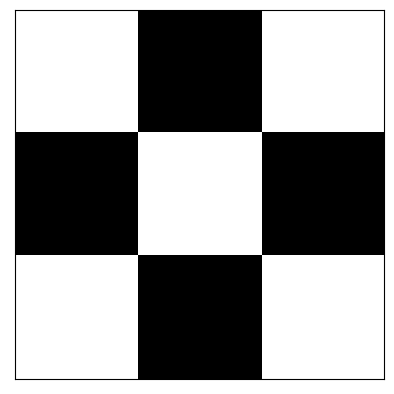

p= 3 n= 2 N=p^n= 9


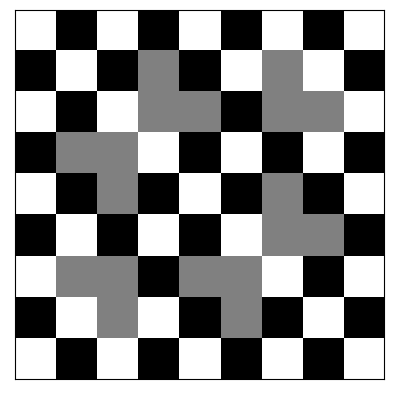

p= 3 n= 3 N=p^n= 27


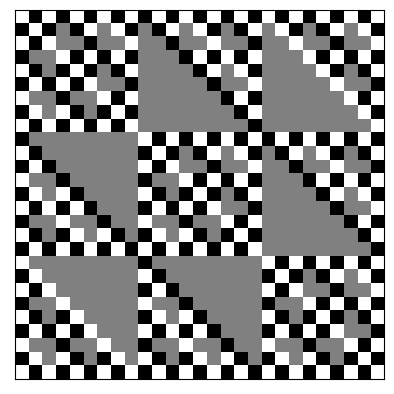

In [7]:
p=3
for n in range(1,4):
    print("p=",p,"n=",n,"N=p^n=",p**n)
    N=p**n
    D=DamierPn(p,n)
    S=damier_pascal_S(N)
    Dtheo=((S%p)!=0).astype('int')
    plt.figure()
    plt.imshow((D)*128,cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.xticks([])  
    plt.yticks([])  
    plt.show()
    

L'utilisation de la régularité du Damier pour $N=p$ avec $p$ premier, et les propriétés du triangle de Pascal modulo $p$, permet d'inférer une règle de construction géomtriquement par récurrence du Damier de taille $N$, modulo $p$ (et pas modulo $N$). On obtient le nombre et la position exacte des cases du Damier $N\times N$ qui ne sont pas congrues à $p$, (et à fortiori pas congrue $p^n$).

## Démonstration $S^{p^n}_{i,j}\mod p$

La Damier $S^N_{i,j}$, pour $0\leq j\leq i\leq N-1$ est défini pour le triangle inférieur gauche par 
$$S^N_{i,j}=\binom{i}{j}+\binom{N-1-j}{N-1-i}$$

Le triangle supérieur droit est construit par symétrie $S_{j,i}=S_{i,j}$.

On s'intérèsse au cas particulier $N=p^n$, $p>2$,$n>1$ et $j\leq i$.

On utilise la décomposition de $i$ et $j$ en base $p$.
$$
\begin{eqnarray}
i&=&i_{n-1}p^{n-1}+i'=\sum_{k=0}^{n-1}i_kp^k\\
j&=&j_{n-1}p^{n-1}+j'=\sum_{k=0}^{n-1}j_kp^k
\end{eqnarray}
$$

Tout d'abord remarquons que $j\leq i$ impose $j_{n-1}\leq i_{n-1}$.

On obtient alors 
$$
\begin{eqnarray}
S^{p^n}_{i,j}&=&\binom{i_{n-1}p^{n-1}+i'}{j_{n-1}p^{n-1}+j'}+\binom{p^n-1-j_{n-1}p^{n-1}-j'}{p^n-1-i_{n-1}p^{n-1}-i'}\\
&=&\binom{i_{n-1}p^{n-1}+i'}{j_{n-1}p^{n-1}+j'}+\binom{(p-1-j_{n-1})p^{n-1}+p^{n-2}-1-j'}{(p-i_{n-1})p^{n-1}+p^{n-2}-1-i'}
\end{eqnarray}
$$

Ce qui par application du théorème de Lucas, nous permet de développer et simplifier l'expression de $S_{i,j}$ modulo $p$.

$$
\begin{eqnarray}
S^{p^n}_{i,j}&\equiv &\binom{i_{n-1}}{j_{n-1}}\binom{i'}{j'}+\binom{p-1-j_{n-1}}{p-1-i_{n-1}}\binom{p^{n-2}-1-j'}{p^{n-2}-1-i'}\mod~p
\end{eqnarray}
$$

Dans le cas où $j'>i'$, $\binom{i'}{j'}=\binom{p-1-j'}{p-1-i'}=0$.

Dans la règle de construction géométrique, cela correspond à l'étape où l'on met à $1$ les grands triangles supérieurs droits du Damier de Pascal pour $N=p^{n-1}$.

Dans le cas où $j_{n-1}\leq i_{n-1}$ (toujours vrai puisque $j\leq i$), on remarque que l'on voit apparaître les termes 
$$
\begin{eqnarray}
A^{N=p}_{i_{n-1},j_{n-1}}&=&\binom{i_{n-1}}{j_{n-1}}\\
B^{N=p}_{i_{n-1},j_{n-1}}&=&\binom{p-1-j_{n-1}}{p-1-i_{n-1}}\\
\end{eqnarray}
$$
Dans le cas où $j'\leq i'$ (cas qui nous intéresse puisque $j'>i'$ a déjà été discuté) on voit apparaître 
$$
\begin{eqnarray}
A^{N=p^{n-1}}_{i',j'}&=&\binom{i'}{j'}\\
B^{N=p^{n-1}}_{i',j'}&=&\binom{p^{n-1}-1-j'}{p^{n-1}-1-i'}
\end{eqnarray}
$$

En ajoutant la relation $S+W=2A$ et $S-W=2B$, 

on obtient:
$$
\begin{eqnarray}
2S^{p^n}_{i,j}&\equiv &S^p_{i_{n-1},j_{n-1}}S^{p^{n-1}}_{i',j'}+W^p_{i_{n-1},j_{n-1}}W^{p^{n-1}}_{i',j'}\mod~p
\end{eqnarray}
$$

$p$ étant premier et strictement supérieur à 2, le théorème du Damier de Pascal impose que le Damier et son miroir sont réguliers, et que l'on passe de l'un à l'autre en permuttant les cases blanches et les cases noires.

- Premier Cas : $i_{n-1}+j_{n-1}\equiv 0\mod~2$
- Deuxième Cas : $i_{n-1}+j_{n-1}\equiv 1\mod~2$

### Premier Cas : $i_{n-1}+j_{n-1}\equiv 0\mod~2$

Alors $W^p_{i_{n-1},j_{n-1}}\equiv 0\mod~p$,  $S^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod~p$ et en conséquence :

$$S^{p^n}_{i,j}\equiv S^{p^{n-1}}_{i',j'}\mod~p$$


### Deuxième Cas : $i_{n-1}+j_{n-1}\equiv 1\mod~2$

Alors $S^p_{i_{n-1},j_{n-1}}\equiv 0\mod p$,  $W^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod p$ et en conséquence :

$$S^{p^n}_{i,j}\equiv W^{p^{n-1}}_{i',j'}\mod~p$$


## Démonstration $W^{p^n}_{i,j}\mod p$

On généralise ici la démonstration précédente, pour le miroir du damier.

Le raisonnement est le même. 
$$
\begin{eqnarray}
W^{p^n}_{i,j}&\equiv &\binom{i_{n-1}}{j_{n-1}}\binom{i'}{j'}-\binom{p-1-j_{n-1}}{p-1-i_{n-1}}\binom{p^{n-2}-1-j'}{p^{n-2}-1-i'}\mod~p
\end{eqnarray}
$$


Dans le cas où $j'>i'$, $\binom{i'}{j'}=\binom{p-1-j'}{p-1-i'}=0$, comme précédemment.

Dans le cas où $j_{n-1}\leq i_{n-1}$ (toujours vrai puisque $j\leq i$), on obtient cette fois



$$
\begin{eqnarray}
2W^{p^n}_{i,j}&\equiv &2\left(A^p_{i_{n-1},j_{n-1}}A^{p^{n-1}}_{i',j'}-B^p_{i_{n-1},j_{n-1}}B^{p^{n-1}}_{i',j'}\right)\mod~p\\
&\equiv&{1\over 2}\left(S^p_{i_{n-1},j_{n-1}}+W^p_{i_{n-1},j_{n-1}}\right)\left(S^{p^{n-1}}_{i',j'}+W^{p^{n-1}}_{i',j'}\right)-{1\over 2}\left(S^p_{i_{n-1},j_{n-1}}-W^p_{i_{n-1},j_{n-1}}\right)\left(S^{p^{n-1}}_{i',j'}-W^{p^{n-1}}_{i',j'}\right)\mod~p\\
&\equiv &S^p_{i_{n-1},j_{n-1}}W^{p^{n-1}}_{i',j'}+W^p_{i_{n-1},j_{n-1}}S^{p^{n-1}}_{i',j'}\mod~p
\end{eqnarray}
$$

### Premier Cas : $i_{n-1}+j_{n-1}\equiv 0\mod~2$

Alors $W^p_{i_{n-1},j_{n-1}}\equiv 0\mod p$, $S^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod p$ et en conséquence :

$$W^{p^n}_{i,j}\equiv W^{p^{n-1}}_{i',j'}\mod p$$


### Deuxième Cas : $i_{n-1}+j_{n-1}\equiv 1\mod~2$

Alors $S^p_{i_{n-1},j_{n-1}}\equiv 0\mod p$, $W^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod p$  et en conséquence :

$$W^{p^n}_{i,j}\equiv S^{p^{n-1}}_{i',j'}\mod p$$


## Conclusion

On a bien démontré la règle de construction par récurrence de $S^{p^n}_{i,j} \mod p$, lorsque $p$ est un nombre premier strictement superieur à 2, à partir de $S^{p^{n-1}}_{i,j} \mod p$, et des décompositions en $p$ de $i=i_{n-1}p^{n-1}+i'$ et $j=j_{n-1}p^{n-1}+j'$ en distinguant les cas suivants :
- $j\leq i$
    - $j'>i \Rightarrow S^{p^n}_{j,i}\equiv0 \mod p$
    - $j'\leq i'$
        - $i_{n-1}+j_{n-1}\equiv 0\mod 2 \Rightarrow S^{p^n}_{j,i}\equiv S^{p^{n-1}}_{i',j'} \mod p$ 
        - $i_{n-1}+j_{n-1}\equiv 1\mod 2 \Rightarrow S^{p^n}_{j,i}\equiv W^{p^{n-1}}_{i',j'} \mod p$ 
- $j>i \Rightarrow S^{p^n}_{j,i}\equiv S^{p^n}_{i,j} \mod p$

De façon immédiate, cette propriété permet:
- de déterminer toutes les cases du Damier de Pascal pour $N=p^n$ congrues ou non à 0 modulo $p$, ainsi que celles qui ne le sont pas. On peut par exemple en déduire un sous ensemble de cases pour lesquelles, on est sûr que $S^N_{i,j}\not\equiv 0\mod p^n$.
- de démontrer la propriété connue selon laquelle $L_{p^n}-1\equiv 0\mod p$, qui comme pour la démonstration de $L_p-1\equiv 0\mod p$ prend la forme d'une égalité terme à terme dans le Damier.

La démonstration pour $W^{p^n}_{i,j}\mod p$ démontre que le principe du miroir s'applique également à $W^{p^n}_{i,j}$ pour les cellules $i,j$ dont le divisibilité est déterminée par le Damier ou son miroir, mais pas lorsque qu'il s'agit des cellules pour lesquelles $j'>i'$.